<a href="https://colab.research.google.com/github/cwang12197/cs_4774_ml/blob/main/CS_4774_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2: Clustering California Housing with K-means

### CS 4774 Machine Learning - Department of Computer Science - University of Virginia
"Tonight, more than 130,000 Californians will go to sleep homeless. That’s enough to fill Dodger Stadium, AT&T Park and Petco Park. The biggest culprit is rising housing costs. From 2000 to 2014, median rent in California increased by more than one-third, while real incomes for renters fell by 7 percent. Today, 1.5 million Californians spend more than half their income on housing. This crisis threatens not just low-income families but our entire economy, driving businesses to relocate to states in which their employees can afford to live. - **Business Insider, Sep 2018.**"

![Half of the homes in San Franciso is now one million or above](https://www.travelinusa.us/wp-content/uploads/sites/3/2017/11/Painted-Ladies-San-Francisco-01.jpg).

In this assignment, you will attempt to cluster the California Housing by implementing and analyzing the k-means algorithm to the data. K-Means is one of the most popular clustering algorithms. K-means stores k-centroids that it uses to define clusters. A point is considered to be in a particular cluster if it is closer to that cluster's centroid than any other centroid. For references, you may refer to my lecture on K-means or Chapter 2 of the textbook if you need additional sample codes to help with your assignment. For deliverables, you must write code in Python and submit this Jupyter Notebook file (.ipynb) to earn a total of 100 pts. You will gain points depending on how you perform in the following sections.

**Note**: In order for your assignment to be graded, you must save your Notebook filename under this format: **yourUvaUserId_assignment_2_kmeans.ipynb**.


---
## 1. PRE-PROCESSING THE DATA (10 pts)

Download the California Housing dataset from the below link. This dataset includes statistics about the median income, median age, average number of rooms per person, average number of persons in a household etc. The statistics were gathered per geographical block.

**Data Acquiring:** Download the dataset from https://www.kaggle.com/camnugent/california-housing-prices

**Data Discovery, Visualization, and Cleaning:** Fortunately, this step have been given to you from chapter 2. However, you should review them and write the code necessary for the purposes of this assignment.

In [5]:
# You might want to use the following package
from pandas.plotting import scatter_matrix # optional
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd
np.random.seed(42)

# Your code goes here for this section.
df = pd.read_csv('housing.csv')

In [6]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
df["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [9]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


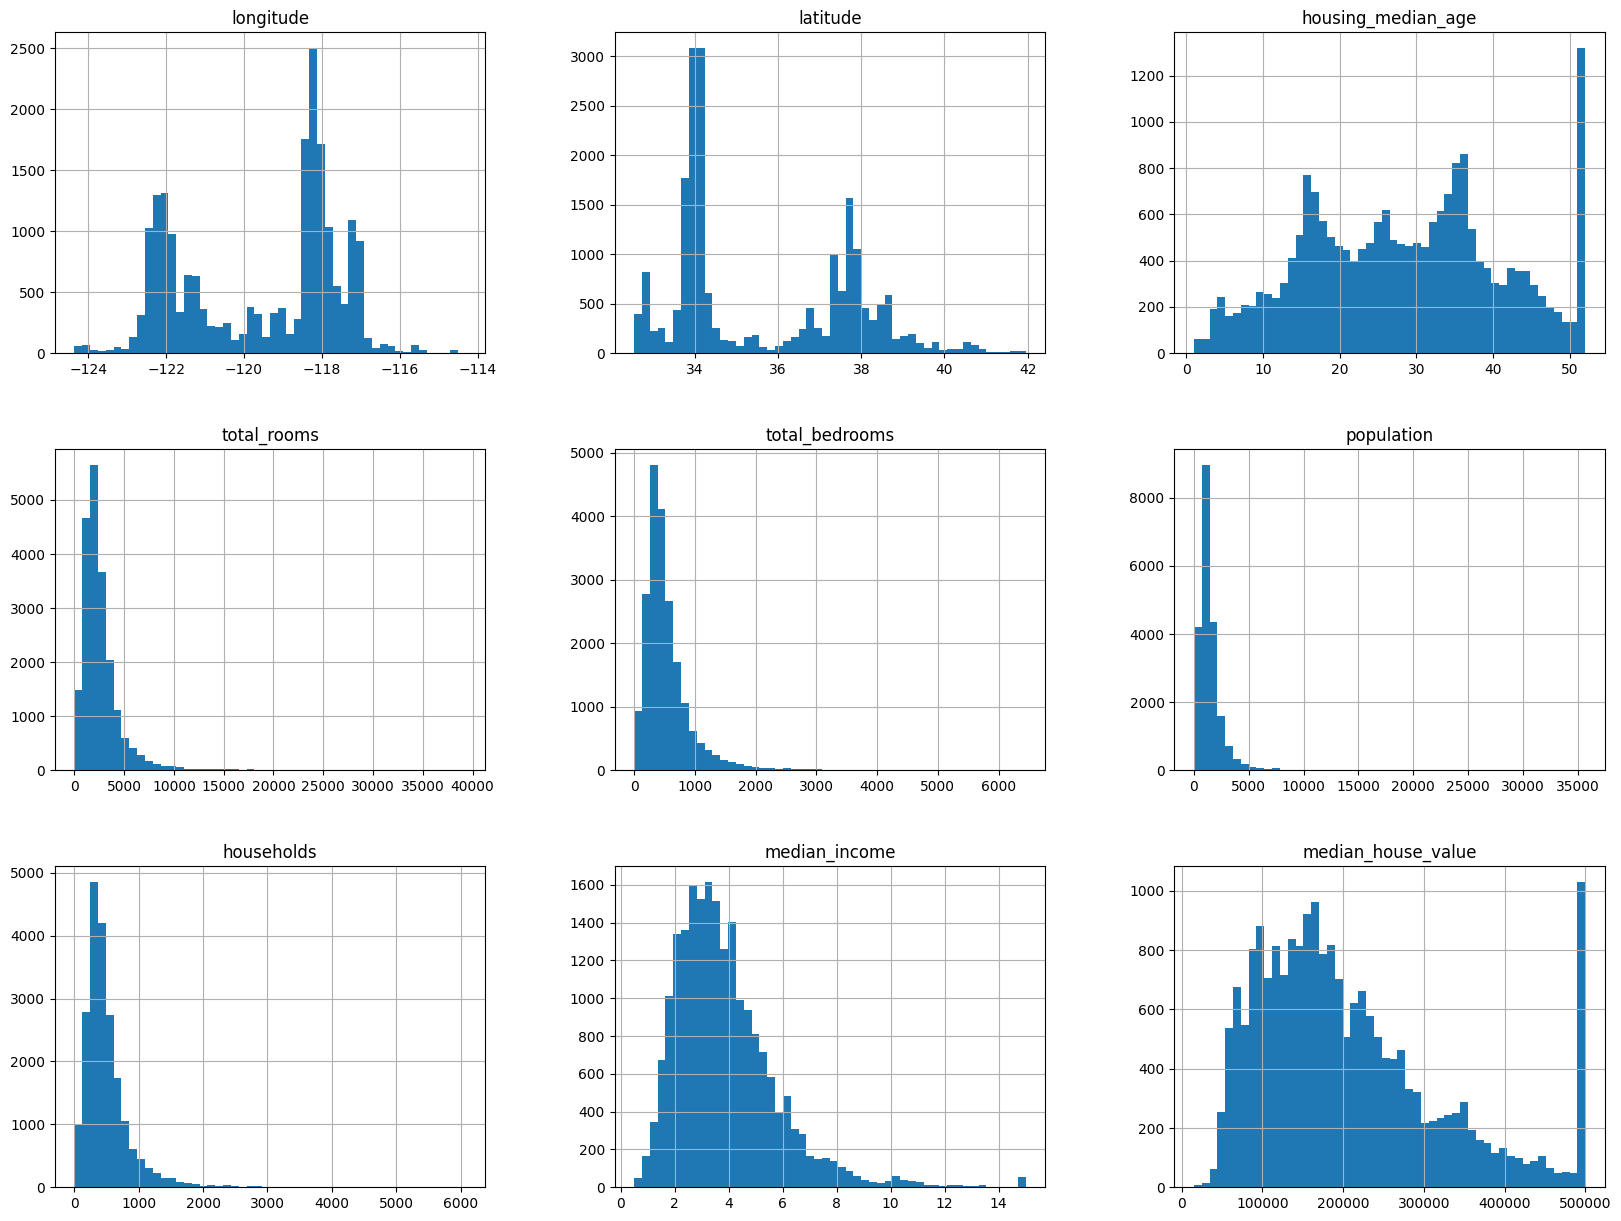

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

In [11]:
df.corr(numeric_only=True)["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

Median house value tends to go up when median income goes up. On the other side, prices tend to go down the further you go north.

<Axes: >

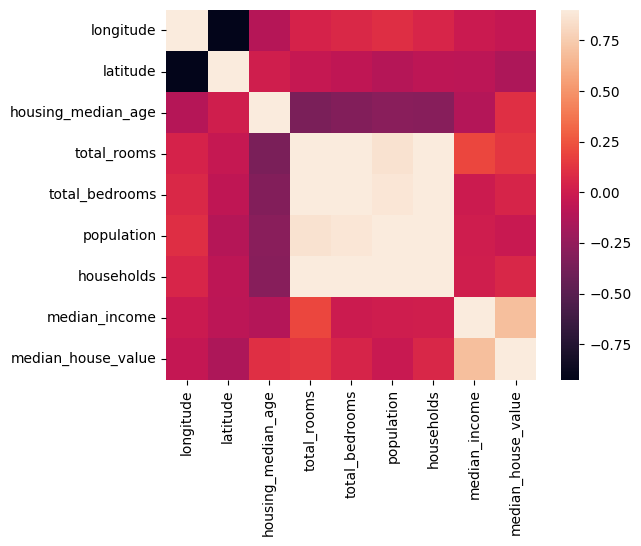

In [12]:
import seaborn as sns

cormat = df.corr(numeric_only=True)
sns.heatmap(cormat, vmax=.9, square=True)

There are a couple of features that are strongly linearly correlated. This may lead to potential skewing of the clusters towards the features.

In [13]:
cat_variables = df.select_dtypes(include=['object']).columns.tolist()
num_variables = df.select_dtypes(include='number').columns.to_list()

In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

encode_cat = Pipeline([('impute', 
                        SimpleImputer(strategy='most_frequent')),
                        ('cat_label', OneHotEncoder(sparse_output=False))])

encode_num = Pipeline([('impute', 
                        SimpleImputer(strategy='mean')), 
                        ('standard_scale', StandardScaler())])

feature_preprocess = ColumnTransformer(transformers = [
    ('categorical', encode_cat, cat_variables), #
    ('quantitative', encode_num, num_variables)]
)
feature_preprocess.set_output(transform='pandas')
processed_df = feature_preprocess.fit_transform(df)

- - -
## 2. IMPLEMENTING K-MEANS (40 pts)

You must implement your own version of K-Means Algorithm. Input a cluster count K and M data points each with its own vector of N features, along with the choice of a distance measure; then:

1. Initialize K centroids. In our case, a centroid is just the average of all data in a cluster.
2. Assign each data point to the cluster that has the closest centroid base on a **distance measure** below.
3. After all data points have been assigned to clusters, recalculate the centroids for each cluster (as averages of all points in the cluster).
4. Repeat the data assignments and centroid calculations until no change in housing assignment occurs between iterations.

**Distance Measures:** Your implementation must include three distance metrics: Manhattan Distance, Euclidean Distance, Sup Distance. These 3 distance metrics can be generalized by the Minkovski Distance:
$D(\mathbf{x},\mathbf{y}) = \sqrt[\leftroot{2}\uproot{2}p]{\sum\limits_{i=1}^n|x_i - y_i|^p}$ where $p=1$ for Mahattan, $p=2$ for Euclidean, and $p=\infty$ for Sup Distance.

**Implementation Notes:** Note that your functions should return distance measures; that is, the returned value should be high if the two vectors are dissimilar, low if they are similar, and zero if they are completely identical.

In [61]:
# Function: K Means
# -------------
# K-Means is an algorithm that takes in a dataset and a constant
# k and returns k centroids (which define clusters of data in the
# dataset which are similar to one another).

#k - number of clusters 
#p - distance measure metric 
#data - df 
def k_mean(k, p, data):
    tolerance = 1e-5
    centroids = 2 * np.random.rand(k, len(data[0])) - 1
    prev_centroid = np.zeros_like(centroids)
    sorted_points = [[] for _ in range(k)]

    centroids = np.array(centroids)
    prev_centroid = np.array(prev_centroid)

    while np.linalg.norm(centroids - prev_centroid) > tolerance:
        sorted_points = [[] for _ in range(k)]
        
        for point in data:
            distance = np.power(np.sum(np.abs(np.power(point - centroids, p)), axis=1), 1 / p)
            centroid_index = np.argmin(distance)
            sorted_points[centroid_index].append(point)
        
        prev_centroid = centroids.copy()
        centroids = np.array([np.mean(cluster, axis=0) if len(cluster) > 0 else prev_centroid[i] 
                              for i, cluster in enumerate(sorted_points)])
        
    
    return sorted_points, centroids


In [29]:
def inertia_std(sorted_points, centroids):
    sse = 0
    std = []

    for centroid_idx, points in enumerate(sorted_points):
        points = np.array(points)
        distances_squared = np.sum((points - centroids[centroid_idx]) ** 2, axis=1)
        sse += np.sum(distances_squared)
        cluster_std = np.sqrt(np.mean(distances_squared)) if len(points) > 0 else 0
        std.append(cluster_std)
    
    return sse, std

- - -
## 3. CLUSTERING HOUSING INTO REGIONS (40 pts)

Now that you have implemented the K-Means as the clustering algorithm. Applying the algorithm for k=2 clusters to see if you can split California into a Northern and Southern regions.

* **Cluster the data:** Report the SSE (sum squared error), cluster means, within cluster standard deviations for each attribute, etc. Visualize the clustering by plot the latitude along the X axis and longitude along the Y axis. You should get a plot that looks roughly in the shape of California (see Chapter 2 for more details). Using the cluster means and std. deviations as representative values in the cluster, what can you say about the clusters that were found? How do they compare with what you know about cities and areas in California? What can you attribute the gaps to? It will definitely be helpful to have a map of California handy.

* **Change the number of clusters:** Increase the value of k from 2 to 3,4,..,10 and repeat the clustering process above. Record cluster means and standard deviations. When you change k, do any additional patterns emerge? If so, what are they? Applying the algorithm for 10 clusters to see if it clearly identified the silicon valley area as one cluster (where houses are relatively new and expensive, median income is high), the area of San Francisco as another etc. While SF and Silicon Valley may have a somewhat similar profile (at least, compared with mid CA), they were separated mainly due to the latitude/longtitue properties, that involve a dimension of geographical cohesiveness.

* **Plot the SSE over different number of cluster:** As referenced in the "elbow plot " in the lecture, you will reproduce the plot with different number of k, then determine which k produces a result that works best.



In [53]:
# Your code goes here
sorted_points, centroids = k_mean(2, 2, processed_df.to_numpy())
sse, std = inertia_std(sorted_points, centroids)

In [54]:
print(f"SSE (Sum of Squared Errors): {sse:.2f}")
print("\nStandard deviations within each cluster:")
for i, std_dev in enumerate(std, start=1):
    print(f"  Cluster {i}: {std_dev:.2f}")

print("\nCluster means (centroids):")
for i, centroid in enumerate(centroids, start=1):
    mean_str = ", ".join(f"{coord:.2f}" for coord in centroid)
    print(f"  Cluster {i} centroid: ({mean_str})")

SSE (Sum of Squared Errors): 155912.46

Standard deviations within each cluster:
  Cluster 1: 3.84
  Cluster 2: 2.57

Cluster means (centroids):
  Cluster 1 centroid: (0.48, 0.33, 0.00, 0.08, 0.11, 0.19, -0.18, -0.88, 1.93, 2.01, 1.86, 2.01, 0.16, 0.14)
  Cluster 2 centroid: (0.44, 0.32, 0.00, 0.11, 0.13, -0.02, 0.02, 0.12, -0.25, -0.26, -0.24, -0.26, -0.02, -0.02)


In [55]:
def convert_centroid_df(sorted_points):
        new_columns = feature_preprocess.get_feature_names_out().tolist()
        new_columns.append('centroid_label')
        df = []
        for centroid_idx, points in enumerate(sorted_points):
                for point in points:
                        temp = point.tolist()
                        temp.append(centroid_idx)
                        df.append(temp)
        df = pd.DataFrame(df, columns=new_columns)
        return df

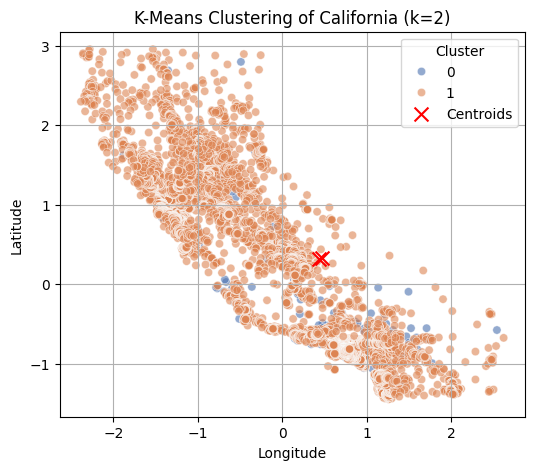

In [56]:
df_clustered = convert_centroid_df(sorted_points)

plt.figure(figsize=(6, 5))
sns.scatterplot(
    data=df_clustered,
    x="quantitative__longitude",
    y="quantitative__latitude",
    hue="centroid_label",
    alpha=0.6,
    palette="deep"
)
centroids_array = np.array(centroids)

plt.scatter(
    centroids_array[:, 0], 
    centroids_array[:, 1], 
    color='red', 
    marker='x', 
    s=100, 
    label='Centroids'
)
plt.title("K-Means Clustering of California (k=2)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


Based on the graph, SSE values, and standard deviations, it seems cluster 1 and cluster 2 are dispersed along the state of California. Cluster 1 has a higher standard deviation compared to cluster 2, suggesting the points are more spread out which could imply more geographical diversity which aligns with our understanding of NorCal having rougher terrain and varying climates than SoCal. Gaps in certain areas may correspond to regions with lower population density or less housing data e.g. mountainous areas or desert regions. The clusters seem to be consistent with the major areas of California such as Los Angeles in the south and San Francisco in the north. 

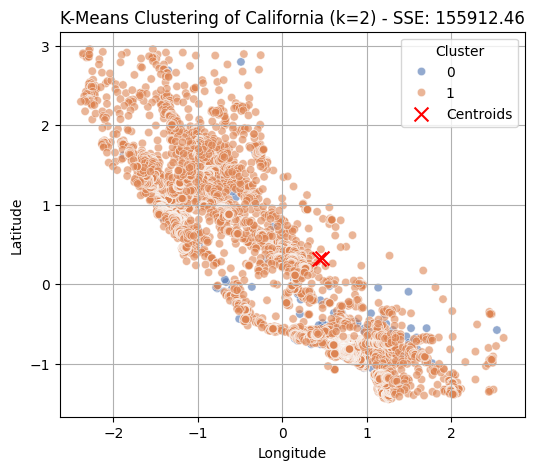


Results for k=2:
SSE (Sum of Squared Errors): 155912.46
Standard deviations within each cluster:
  Cluster 1: 3.84
  Cluster 2: 2.57

Cluster means (centroids):
  Cluster 1 centroid: (0.48, 0.33, 0.00, 0.08, 0.11, 0.19, -0.18, -0.88, 1.93, 2.01, 1.86, 2.01, 0.16, 0.14)
  Cluster 2 centroid: (0.44, 0.32, 0.00, 0.11, 0.13, -0.02, 0.02, 0.12, -0.25, -0.26, -0.24, -0.26, -0.02, -0.02)


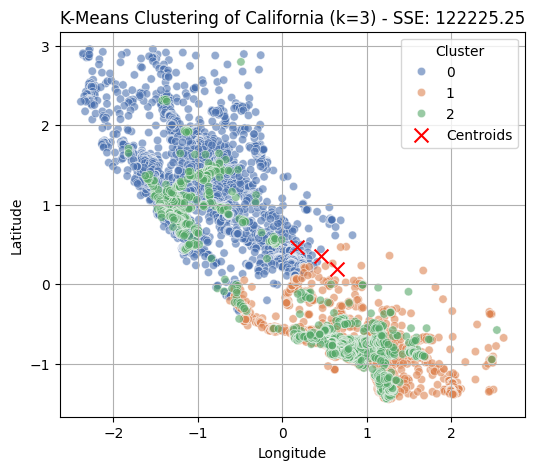


Results for k=3:
SSE (Sum of Squared Errors): 122225.25
Standard deviations within each cluster:
  Cluster 1: 2.32
  Cluster 2: 2.17
  Cluster 3: 4.02

Cluster means (centroids):
  Cluster 1 centroid: (0.17, 0.47, 0.00, 0.26, 0.10, -1.03, 1.07, 0.07, -0.21, -0.24, -0.28, -0.25, -0.07, -0.13)
  Cluster 2 centroid: (0.65, 0.19, 0.00, 0.00, 0.16, 0.79, -0.82, 0.09, -0.21, -0.20, -0.14, -0.19, 0.03, 0.08)
  Cluster 3 centroid: (0.46, 0.35, 0.00, 0.08, 0.10, 0.20, -0.18, -0.95, 2.36, 2.42, 2.24, 2.42, 0.19, 0.14)


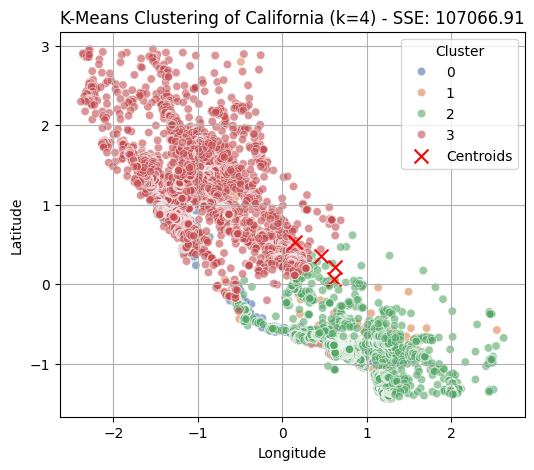


Results for k=4:
SSE (Sum of Squared Errors): 107066.91
Standard deviations within each cluster:
  Cluster 1: 2.54
  Cluster 2: 4.04
  Cluster 3: 1.88
  Cluster 4: 2.07

Cluster means (centroids):
  Cluster 1 centroid: (0.61, 0.06, 0.00, 0.14, 0.19, -0.02, -0.21, 0.10, 0.05, -0.21, -0.26, -0.18, 1.53, 1.72)
  Cluster 2 centroid: (0.46, 0.36, 0.00, 0.08, 0.10, 0.19, -0.16, -0.97, 2.46, 2.54, 2.36, 2.54, 0.13, 0.08)
  Cluster 3 centroid: (0.62, 0.22, 0.00, 0.00, 0.15, 0.81, -0.81, 0.09, -0.25, -0.17, -0.09, -0.17, -0.30, -0.28)
  Cluster 4 centroid: (0.15, 0.53, 0.00, 0.24, 0.08, -1.01, 1.10, 0.06, -0.24, -0.24, -0.28, -0.26, -0.32, -0.41)


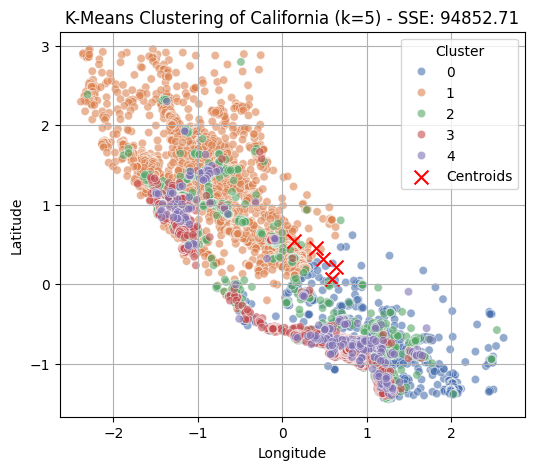


Results for k=5:
SSE (Sum of Squared Errors): 94852.71
Standard deviations within each cluster:
  Cluster 1: 1.76
  Cluster 2: 2.00
  Cluster 3: 2.58
  Cluster 4: 2.50
  Cluster 5: 5.02

Cluster means (centroids):
  Cluster 1 centroid: (0.63, 0.21, 0.00, 0.00, 0.15, 0.81, -0.82, 0.18, -0.34, -0.28, -0.20, -0.28, -0.30, -0.28)
  Cluster 2 centroid: (0.14, 0.54, 0.00, 0.24, 0.08, -1.01, 1.11, 0.10, -0.30, -0.31, -0.33, -0.32, -0.34, -0.42)
  Cluster 3 centroid: (0.49, 0.32, 0.00, 0.08, 0.12, 0.18, -0.19, -0.80, 1.27, 1.40, 1.29, 1.41, 0.03, 0.05)
  Cluster 4 centroid: (0.60, 0.06, 0.00, 0.15, 0.19, -0.04, -0.18, 0.14, -0.03, -0.28, -0.33, -0.26, 1.58, 1.75)
  Cluster 5 centroid: (0.40, 0.46, 0.00, 0.07, 0.08, 0.36, -0.26, -1.32, 5.25, 5.10, 4.88, 5.05, 0.30, 0.07)


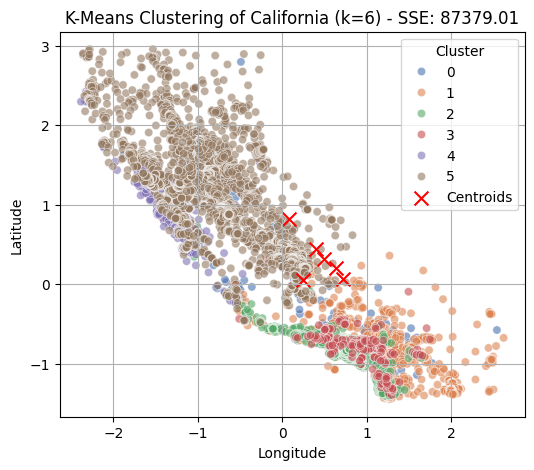


Results for k=6:
SSE (Sum of Squared Errors): 87379.01
Standard deviations within each cluster:
  Cluster 1: 2.58
  Cluster 2: 1.74
  Cluster 3: 2.34
  Cluster 4: 5.05
  Cluster 5: 1.99
  Cluster 6: 1.80

Cluster means (centroids):
  Cluster 1 centroid: (0.49, 0.32, 0.00, 0.07, 0.12, 0.21, -0.21, -0.81, 1.33, 1.47, 1.35, 1.48, 0.01, 0.03)
  Cluster 2 centroid: (0.64, 0.20, 0.00, 0.00, 0.16, 0.81, -0.83, 0.20, -0.35, -0.28, -0.19, -0.28, -0.33, -0.30)
  Cluster 3 centroid: (0.72, 0.07, 0.00, 0.03, 0.18, 0.46, -0.62, -0.04, -0.01, -0.27, -0.31, -0.26, 1.64, 1.66)
  Cluster 4 centroid: (0.40, 0.45, 0.00, 0.07, 0.08, 0.37, -0.28, -1.33, 5.36, 5.19, 5.00, 5.16, 0.31, 0.08)
  Cluster 5 centroid: (0.25, 0.05, 0.00, 0.53, 0.17, -1.31, 0.96, 0.68, -0.21, -0.26, -0.30, -0.24, 0.26, 0.58)
  Cluster 6 centroid: (0.08, 0.83, 0.00, 0.06, 0.03, -0.80, 1.15, -0.30, -0.30, -0.30, -0.33, -0.33, -0.53, -0.82)


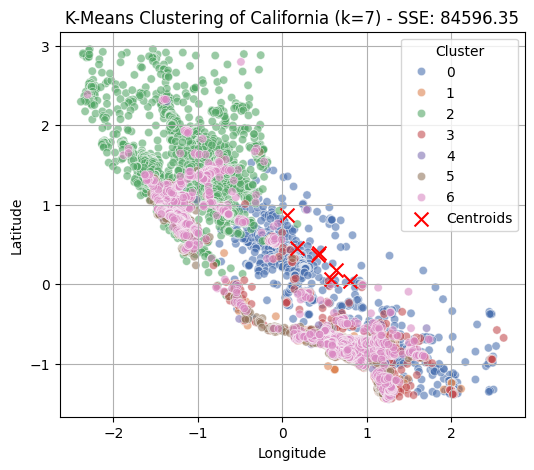


Results for k=7:
SSE (Sum of Squared Errors): 84596.35
Standard deviations within each cluster:
  Cluster 1: 1.72
  Cluster 2: 1.48
  Cluster 3: 2.02
  Cluster 4: 1.81
  Cluster 5: 5.19
  Cluster 6: 2.51
  Cluster 7: 2.75

Cluster means (centroids):
  Cluster 1 centroid: (0.06, 0.87, 0.00, 0.00, 0.07, 0.55, -0.21, -0.38, -0.41, -0.40, -0.35, -0.43, -0.59, -0.94)
  Cluster 2 centroid: (0.81, 0.04, 0.00, 0.00, 0.15, 0.73, -0.83, 0.65, -0.49, -0.45, -0.35, -0.44, -0.22, -0.06)
  Cluster 3 centroid: (0.17, 0.46, 0.00, 0.28, 0.09, -1.16, 1.20, 0.17, -0.26, -0.27, -0.31, -0.28, -0.26, -0.28)
  Cluster 4 centroid: (0.63, 0.18, 0.00, 0.00, 0.19, 0.82, -0.85, -0.55, 0.32, 0.43, 0.47, 0.44, -0.07, -0.03)
  Cluster 5 centroid: (0.44, 0.39, 0.00, 0.07, 0.10, 0.32, -0.26, -1.39, 6.08, 5.77, 5.61, 5.77, 0.43, 0.17)
  Cluster 6 centroid: (0.57, 0.07, 0.00, 0.17, 0.19, -0.12, -0.11, 0.10, -0.01, -0.30, -0.34, -0.28, 1.80, 1.88)
  Cluster 7 centroid: (0.42, 0.36, 0.00, 0.11, 0.10, -0.09, 0.09, -0.89, 

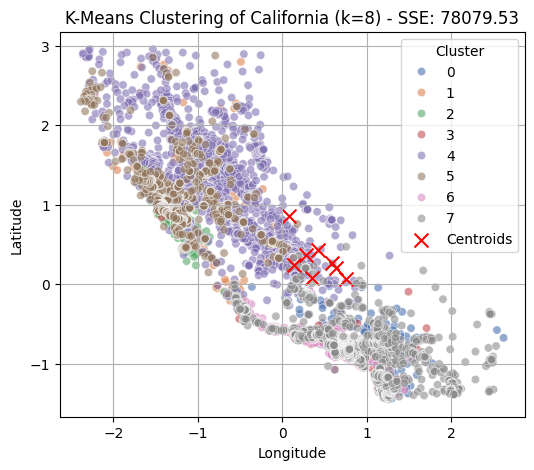


Results for k=8:
SSE (Sum of Squared Errors): 78079.53
Standard deviations within each cluster:
  Cluster 1: 2.11
  Cluster 2: 2.16
  Cluster 3: 2.12
  Cluster 4: 4.85
  Cluster 5: 1.63
  Cluster 6: 1.67
  Cluster 7: 2.10
  Cluster 8: 1.64

Cluster means (centroids):
  Cluster 1 centroid: (0.59, 0.26, 0.00, 0.00, 0.14, 0.85, -0.82, -0.69, 0.83, 1.02, 0.98, 1.01, -0.13, -0.08)
  Cluster 2 centroid: (0.28, 0.37, 0.00, 0.23, 0.12, -1.11, 1.02, -0.70, 1.03, 1.05, 0.94, 1.10, 0.04, 0.02)
  Cluster 3 centroid: (0.35, 0.07, 0.00, 0.39, 0.18, -1.27, 0.91, 0.14, -0.11, -0.33, -0.35, -0.30, 1.28, 1.40)
  Cluster 4 centroid: (0.43, 0.43, 0.00, 0.07, 0.08, 0.35, -0.28, -1.23, 4.61, 4.53, 4.26, 4.48, 0.30, 0.11)
  Cluster 5 centroid: (0.08, 0.86, 0.00, 0.03, 0.03, -0.72, 1.11, -0.57, -0.32, -0.34, -0.36, -0.38, -0.47, -0.81)
  Cluster 6 centroid: (0.14, 0.24, 0.00, 0.49, 0.13, -1.25, 1.08, 1.16, -0.44, -0.41, -0.45, -0.41, -0.42, -0.24)
  Cluster 7 centroid: (0.76, 0.06, 0.00, 0.00, 0.17, 0.70, -0

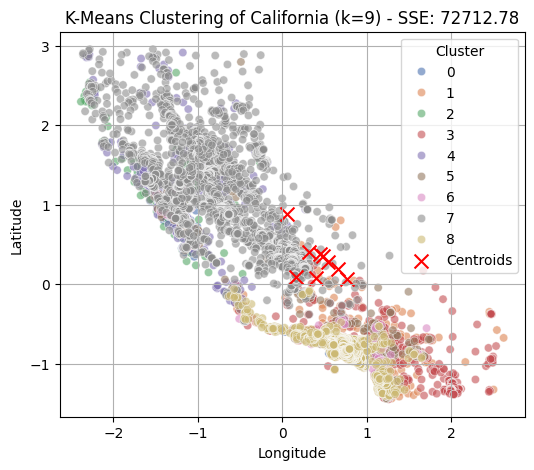


Results for k=9:
SSE (Sum of Squared Errors): 72712.78
Standard deviations within each cluster:
  Cluster 1: 2.41
  Cluster 2: 1.78
  Cluster 3: 1.73
  Cluster 4: 1.54
  Cluster 5: 1.91
  Cluster 6: 2.71
  Cluster 7: 5.23
  Cluster 8: 1.63
  Cluster 9: 1.94

Cluster means (centroids):
  Cluster 1 centroid: (0.40, 0.08, 0.00, 0.34, 0.18, -1.05, 0.72, 0.08, -0.08, -0.41, -0.40, -0.39, 2.26, 1.83)
  Cluster 2 centroid: (0.54, 0.28, 0.00, 0.00, 0.17, 0.86, -0.83, -0.55, 0.29, 0.45, 0.49, 0.45, -0.26, -0.27)
  Cluster 3 centroid: (0.16, 0.09, 0.00, 0.58, 0.16, -1.32, 1.03, 1.14, -0.38, -0.36, -0.43, -0.35, -0.19, 0.19)
  Cluster 4 centroid: (0.66, 0.19, 0.00, 0.00, 0.14, 0.79, -0.81, 0.49, -0.53, -0.48, -0.36, -0.47, -0.39, -0.36)
  Cluster 5 centroid: (0.31, 0.40, 0.00, 0.18, 0.11, -1.10, 1.05, -0.69, 0.57, 0.54, 0.48, 0.57, 0.06, -0.05)
  Cluster 6 centroid: (0.49, 0.35, 0.00, 0.07, 0.10, 0.30, -0.28, -0.94, 2.18, 2.31, 2.08, 2.30, 0.14, 0.12)
  Cluster 7 centroid: (0.45, 0.38, 0.00, 0.0

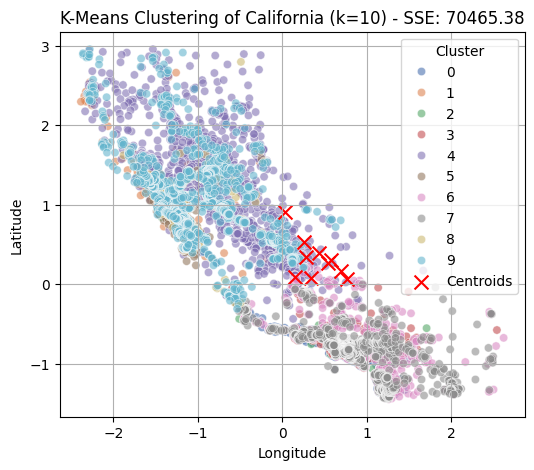


Results for k=10:
SSE (Sum of Squared Errors): 70465.38
Standard deviations within each cluster:
  Cluster 1: 2.10
  Cluster 2: 1.67
  Cluster 3: 5.18
  Cluster 4: 2.44
  Cluster 5: 1.57
  Cluster 6: 2.11
  Cluster 7: 1.75
  Cluster 8: 1.51
  Cluster 9: 2.33
  Cluster 10: 1.72

Cluster means (centroids):
  Cluster 1 centroid: (0.76, 0.06, 0.00, 0.00, 0.17, 0.70, -0.83, 0.04, -0.05, -0.28, -0.34, -0.27, 1.43, 1.60)
  Cluster 2 centroid: (0.15, 0.09, 0.00, 0.60, 0.15, -1.33, 1.04, 1.21, -0.38, -0.34, -0.41, -0.34, -0.27, 0.08)
  Cluster 3 centroid: (0.44, 0.39, 0.00, 0.07, 0.10, 0.30, -0.25, -1.39, 6.08, 5.78, 5.64, 5.79, 0.42, 0.16)
  Cluster 4 centroid: (0.58, 0.30, 0.00, 0.00, 0.11, 0.84, -0.79, -0.87, 1.81, 2.01, 1.80, 1.97, 0.07, 0.12)
  Cluster 5 centroid: (0.04, 0.92, 0.00, 0.03, 0.02, -0.66, 1.08, -0.17, -0.52, -0.53, -0.54, -0.57, -0.64, -0.93)
  Cluster 6 centroid: (0.35, 0.08, 0.00, 0.38, 0.20, -1.26, 0.91, 0.06, -0.12, -0.37, -0.39, -0.35, 1.54, 1.54)
  Cluster 7 centroid: (

In [57]:
for k in range(2, 11):
    sorted_points, centroids = k_mean(k, 2, processed_df.to_numpy())
    sse, std = inertia_std(sorted_points, centroids)
    
    df_clustered = convert_centroid_df(sorted_points)

    plt.figure(figsize=(6, 5))
    sns.scatterplot(
        data=df_clustered,
        x="quantitative__longitude",
        y="quantitative__latitude",
        hue="centroid_label",
        alpha=0.6,
        palette="deep"
    )

    centroids_array = np.array(centroids)
    plt.scatter(
        centroids_array[:, 0],
        centroids_array[:, 1],
        color='red',
        marker='x',
        s=100,
        label='Centroids'
    )

    plt.title(f"K-Means Clustering of California (k={k}) - SSE: {sse:.2f}")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.show()
    
    print(f"\nResults for k={k}:")
    print(f"SSE (Sum of Squared Errors): {sse:.2f}")
    print("Standard deviations within each cluster:")
    for i, std_dev in enumerate(std, start=1):
        print(f"  Cluster {i}: {std_dev:.2f}")

    print("\nCluster means (centroids):")
    for i, centroid in enumerate(centroids, start=1):
        mean_str = ", ".join(f"{coord:.2f}" for coord in centroid)
        print(f"  Cluster {i} centroid: ({mean_str})")

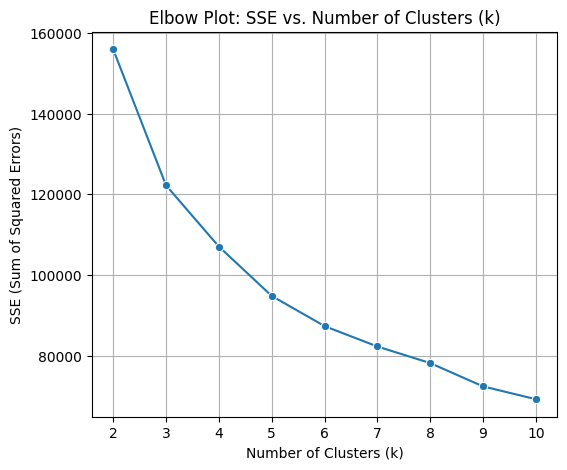

In [59]:
sse_values = []

k_range = range(2, 11)

for k in k_range:
    sorted_points, centroids = k_mean(k, 2, processed_df.to_numpy())
    sse, _ = inertia_std(sorted_points, centroids)
    sse_values.append(sse)

inertia_df = pd.DataFrame({
    'k': list(k_range),
    'sse': sse_values
})

plt.figure(figsize=(6, 5))
sns.lineplot(data=inertia_df, x='k', y='sse', marker='o')
plt.title('Elbow Plot: SSE vs. Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

Looking at the inertia graph, it seems 5 or 6 is the elbow point, but it is hard to tell. 

- - -
## 4. WRITING ON THE INTUITION FOR THE CALIFORNIA HOUSING CRISIS (10 pts)

This question is a qualitative one, and is intended to let you experiment with a real world clustering task. Hopefully it gives you some intuition as for how the preset number of clusters affects the clustering results. Too few clusters may not reveal the information that is in the data. Too many clusters may hurt data analysis as well, as it may not generalize (and in this sense, it is equivalent to over fitting).

Write at least one paragraph to demonstrate your intuition on the California Housing Crisis. You might also want to mention some possible solutions to solve it. You will receive credits based upon your insights and intuitions on this challenge.



For this assignment, we used k-means to analyze the housing market in California. 
From our analysis, we can see that k=5 and k=6 were our best clusters. Looking at the graphs, the clustering of California's housing data provides valuable insights into the regional differences and inherent complexity of the housing situation. As the number of clusters grow, the data better separates to highlight regions like San Francisco and inland deserts region that have distinct housing markets and economic conditions.

California is incredibly diverse, and as a result any housing-related proposals must be tailored to the specific needs of the region. For example, Southern California suffers from high demand for housing and low supply of affordable housing, which would require driving urban development policies that reduce urban sprawl and improve transportation options. Zoning changes are tax credits could also incentivize the construction of more affordable housing in densely populated areas. Additionally, making transportation more accessible could improve the urban sprawl and expand the spread of regional clusters. This would be particularly helpful in the Bay Area where commuting from less expensive regions is common. 

- - -
### NEED HELP?

In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my lectures and/or the textbook
 * Talk to the TA, they are available and there to help you during their OH.
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS4774 Assignment 2:...".

Best of luck and have fun!